# Sentiment Analysis in Python

In [ ]:
!pip install svgling

In [32]:
#read data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import svgling
plt.style.use('ggplot')
import nltk

In [5]:
#read data
df = pd.read_excel('/content/cmiyp_scrapped_tweets.xlsx')

In [7]:
print(df.shape)
df.head()

(526, 6)


,Tweet text,Date,Retweets,Likes,Language,Translated Tweet
0,अटल बिहारी वाजपेयी सुशासन एवं नीति विश्लेषण सं...,2023-07-18T02:40:30.000Z,144,186,hi,Atal Bihari Vajpayee's good governance and pol...
1,जनसेवा मित्र कार्यक्रम बैच - 2 के साक्षत्कार प...,2023-07-18T07:15:04.000Z,18,21,hi,Janseva Mitra program batch - 2 of 2 has start...
2,India’s biggest internship drive. .,2023-07-18T06:36:20.000Z,30,27,en,India’s biggest internship drive. .
3,मुख्यमंत्री युवा इंटर्नशिप कार्यक्रम बैच- 1 के...,2023-07-17T15:22:55.000Z,169,268,hi,The Chief Minister shared his experience durin...
4,मुख्यमंत्री जनसेवा मित्र बैच-2 के लिए आज प्रथम...,2023-07-17T13:39:54.000Z,104,148,hi,The process of first day interview for Chief M...


Quick EDA

Text(0.5, 0, 'Languages')

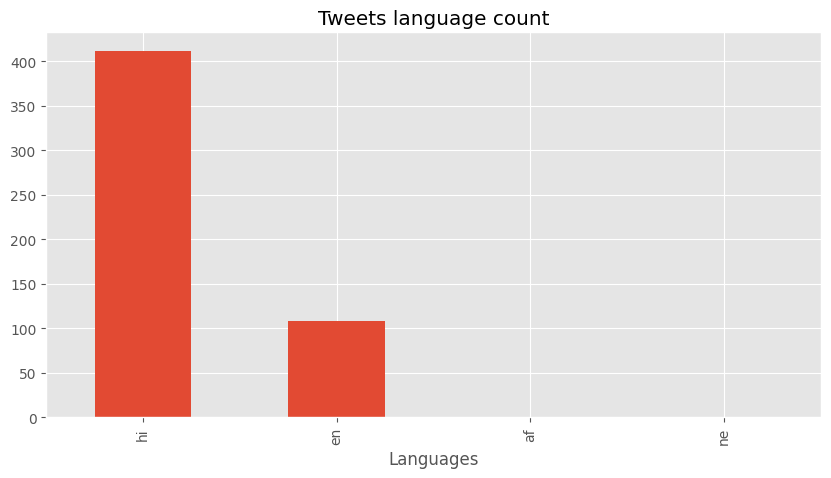

In [13]:
ax = df['Language'].value_counts() \
.plot(kind='bar',title='Tweets language count',figsize=(10,5))
ax.set_xlabel('Languages')

Meanes there are 412 hindi tweets and 108 english tweets.

In [14]:
example = df['Translated Tweet'][30]
print(example)

"Sending our heartfelt wishes to the Chandrayaan 3 mission from CMYIP team May this cosmic endeavor illuminate new horizons for India!


In [29]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [83]:
tokens=nltk.word_tokenize(df['Translated Tweet'].loc[525])
tokens[:10]

['A',
 'divisional',
 'brainstorming',
 'meeting',
 'was',
 'organised',
 'for',
 'Chief',
 'Minister',
 '’']

In [82]:
tagged=nltk.pos_tag(tokens)
tagged[:3]


[('``', '``'), ('Sending', 'VBG'), ('our', 'PRP$')]

In [85]:
entities=nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  ``/``
  Sending/VBG
  our/PRP$
  heartfelt/NN
  wishes/VBZ
  to/TO
  the/DT
  Chandrayaan/NNP
  3/CD
  mission/NN
  from/IN
  (ORGANIZATION CMYIP/NNP)
  team/NN
  May/NNP
  this/DT
  cosmic/JJ
  endeavor/NN
  illuminate/VB
  new/JJ
  horizons/NNS
  for/IN
  (GPE India/NNP)
  !/.)


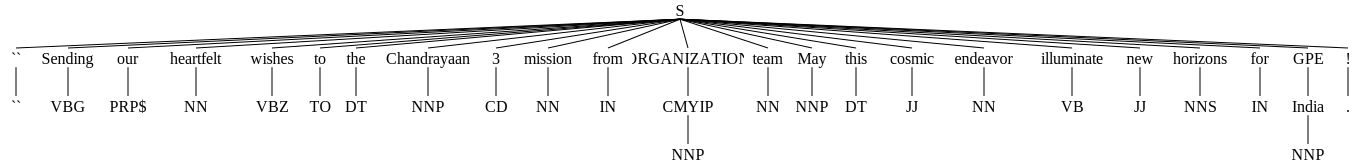

In [89]:
nltk.chunk.ne_chunk(tagged)

# Clean the data to remove numbers from rows

In [68]:
df.columns

Index(['Tweet text', 'Date', 'Retweets', 'Likes', 'Language',
       'Translated Tweet'],
      dtype='object')

In [70]:
import re
def remove_numbers(text):
    # Remove numbers using regex
    nonum = re.sub(r'\d+', '', str(text))
    return nonum

df['Translated Tweet'] = df['Translated Tweet'].apply(remove_numbers)


# *Start sentiment analysis by VADER*

In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [80]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.6588}

In [47]:
sia.polarity_scores('she is a bad sister')

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [71]:
#now run polarity scores on all the dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=row['Translated Tweet']
  res[i]=sia.polarity_scores(text)

  0%|          | 0/526 [00:00<?, ?it/s]

In [92]:
res

{0: {'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compound': 0.9769},
 1: {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.7964},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9253},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.5994},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.5994},
 9: {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.9136},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.9559},
 12: {'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.4215},
 13: {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'compound': -0.7003},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

In [99]:
vaders=pd.DataFrame(res).T

In [105]:
vaders

,neg,neu,pos,compound
0,0.000,0.440,0.560,0.9769
1,0.000,0.776,0.224,0.7964
2,0.000,1.000,0.000,0.0000
3,0.000,0.695,0.305,0.9253
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
521,0.087,0.913,0.000,-0.5574
522,0.000,1.000,0.000,0.0000
523,0.000,1.000,0.000,0.0000
524,0.000,0.804,0.196,0.6808


In [107]:
df = pd.concat([df, vaders], axis=1)

In [108]:
df

,Tweet text,Date,Retweets,Likes,Language,Translated Tweet,neg,neu,pos,compound
0,अटल बिहारी वाजपेयी सुशासन एवं नीति विश्लेषण सं...,2023-07-18T02:40:30.000Z,144,186,hi,Atal Bihari Vajpayee's good governance and pol...,0.000,0.440,0.560,0.9769
1,जनसेवा मित्र कार्यक्रम बैच - 2 के साक्षत्कार प...,2023-07-18T07:15:04.000Z,18,21,hi,Janseva Mitra program batch - of has started...,0.000,0.776,0.224,0.7964
2,India’s biggest internship drive. .,2023-07-18T06:36:20.000Z,30,27,en,India’s biggest internship drive. .,0.000,1.000,0.000,0.0000
3,मुख्यमंत्री युवा इंटर्नशिप कार्यक्रम बैच- 1 के...,2023-07-17T15:22:55.000Z,169,268,hi,The Chief Minister shared his experience durin...,0.000,0.695,0.305,0.9253
4,मुख्यमंत्री जनसेवा मित्र बैच-2 के लिए आज प्रथम...,2023-07-17T13:39:54.000Z,104,148,hi,The process of first day interview for Chief M...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
521,प्रशिक्षण के दौरान कलेक्टर श्री सिंह ने युवाओं...,2023-03-03T14:24:11.000Z,10,33,hi,"During the training, Collector Shri Singh told...",0.087,0.913,0.000,-0.5574
522,मुख्यमंत्री यूथ इंटर्नशिप फोर प्रोफेशनल डेवलेप...,2023-03-02T16:39:41.000Z,6,43,hi,-day training of Jan Seva Mitra starts under ...,0.000,1.000,0.000,0.0000
523,ट्रेनिंग के माध्यम से को शासकीय योजनाओं का क्...,2023-03-02T12:42:26.000Z,77,154,hi,"Through training, the implementation of govern...",0.000,1.000,0.000,0.0000
524,शासन की चिन्हित योजनाओं का प्रचार-प्रसार करने ...,2023-03-02T07:35:26.000Z,9,43,hi,Collector Shri Shivam Verma addressing a three...,0.000,0.804,0.196,0.6808


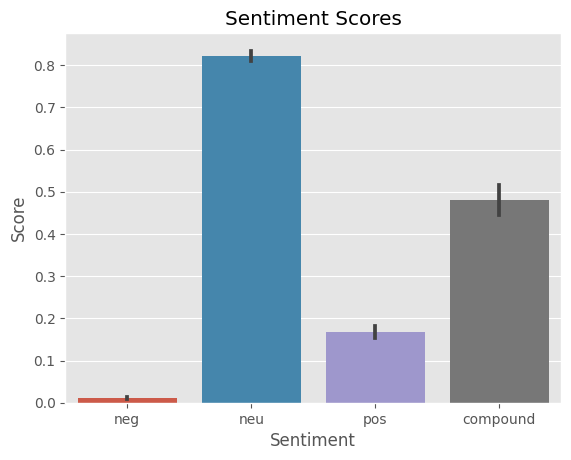

In [112]:
#Bar plot
sns.barplot(data=df[['neg', 'neu', 'pos', 'compound']])
plt.title('Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()

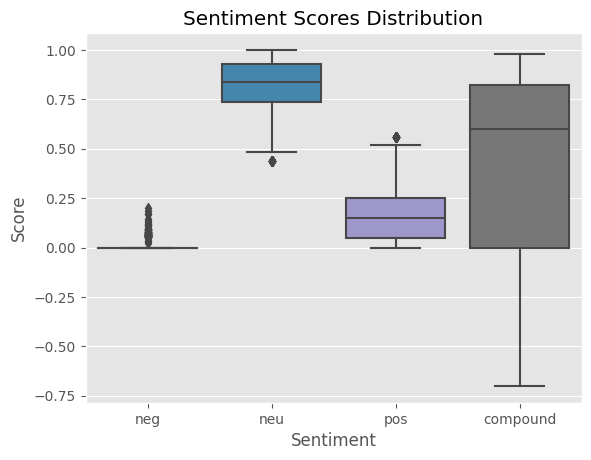

In [114]:
# Box Plot
sns.boxplot(data=df[['neg', 'neu', 'pos', 'compound']])
plt.title('Sentiment Scores Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()

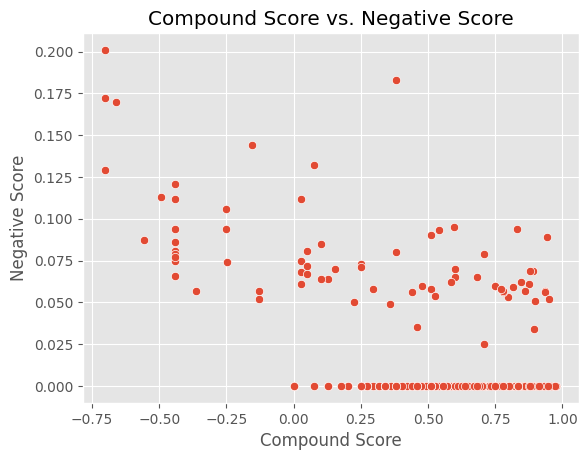

In [115]:
# Scatter Plot
sns.scatterplot(x=df['compound'], y=df['neg'])
plt.title('Compound Score vs. Negative Score')
plt.xlabel('Compound Score')
plt.ylabel('Negative Score')
plt.show()

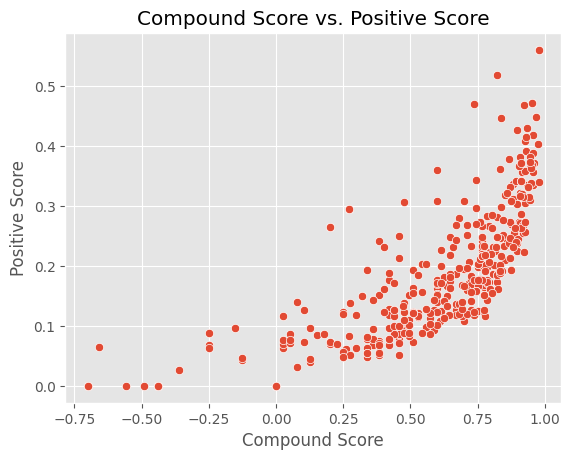

In [118]:
# Scatter Plot
sns.scatterplot(x=df['compound'], y=df['pos'])
plt.title('Compound Score vs. Positive Score')
plt.xlabel('Compound Score')
plt.ylabel('Positive Score')
plt.show()

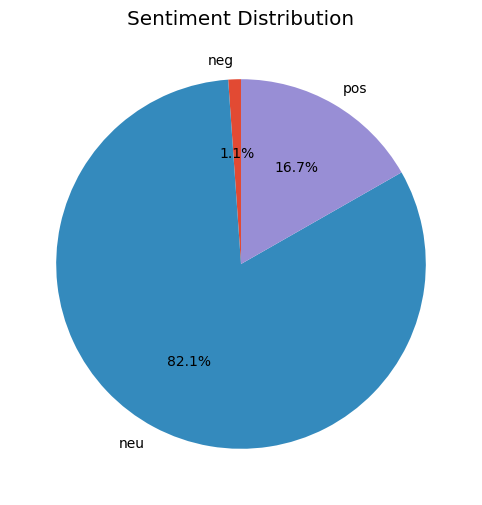

In [121]:
# Calculate the sum of sentiment scores
sentiment_sum = df[['neg', 'neu', 'pos']].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_sum, labels=sentiment_sum.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

# Roberta Pretrined Model

In [123]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.2 MB/s eta 0:00:00


In [124]:
from scipy.special import softmax

In [133]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

In [135]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [136]:
#Vader result on example
print(example)
sia.polarity_scores(example)

"Sending our heartfelt wishes to the Chandrayaan 3 mission from CMYIP team May this cosmic endeavor illuminate new horizons for India!


{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.6588}

In [137]:
# run on roberta model
encoded_text=tokenizer(example, return_tensors='pt')

In [141]:
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores
scores_dict = {
    'roberts_neg':scores[0],
    'roberts_neu':scores[1],
    'roberts_pos':scores[2]
}
print(scores_dict)

{'roberts_neg': 0.0011883783, 'roberts_neu': 0.061089374, 'roberts_pos': 0.9377222}


In [143]:
def polarity_scores_roberts(example):
  encoded_text=tokenizer(example, return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores
  scores_dict = {
      'roberts_neg':scores[0],
      'roberts_neu':scores[1],
      'roberts_pos':scores[2]
  }
  return scores_dict

In [151]:
#now run polarity scores on all the dataset using roberta
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=row['Translated Tweet']
  vader_results=sia.polarity_scores(text)
  roberta_results = polarity_scores_roberts(text)
  both={**vader_results,**roberta_results}
  res[i]=both



  0%|          | 0/526 [00:00<?, ?it/s]

In [152]:
res

{0: {'neg': 0.0,
  'neu': 0.44,
  'pos': 0.56,
  'compound': 0.9769,
  'roberts_neg': 0.0018993707,
  'roberts_neu': 0.037482224,
  'roberts_pos': 0.96061844},
 1: {'neg': 0.0,
  'neu': 0.776,
  'pos': 0.224,
  'compound': 0.7964,
  'roberts_neg': 0.0011793055,
  'roberts_neu': 0.048285786,
  'roberts_pos': 0.9505349},
 2: {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'roberts_neg': 0.021144105,
  'roberts_neu': 0.4841463,
  'roberts_pos': 0.4947096},
 3: {'neg': 0.0,
  'neu': 0.695,
  'pos': 0.305,
  'compound': 0.9253,
  'roberts_neg': 0.004317875,
  'roberts_neu': 0.1833047,
  'roberts_pos': 0.81237745},
 4: {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'roberts_neg': 0.028282464,
  'roberts_neu': 0.9235283,
  'roberts_pos': 0.04818922},
 5: {'neg': 0.0,
  'neu': 0.824,
  'pos': 0.176,
  'compound': 0.5994,
  'roberts_neg': 0.0024358004,
  'roberts_neu': 0.11492593,
  'roberts_pos': 0.8826382},
 6: {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound'

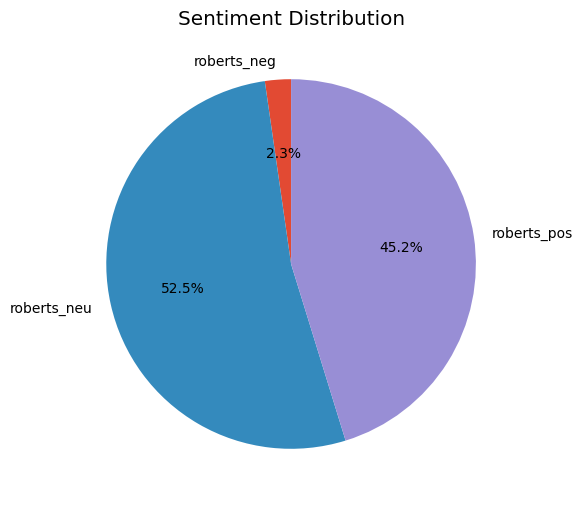

In [176]:
results_df = pd.DataFrame.from_dict(res, orient='index')

# Calculate the sum of sentiment scores
sentiment_sum = results_df[['roberts_neg', 'roberts_neu', 'roberts_pos']].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_sum, labels=sentiment_sum.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

In [157]:
sentiment_sum

roberts_neg     11.955635
roberts_neu    276.113251
roberts_pos    237.931107
dtype: float32

# Extra: The Transformers Pipeline
  

```
# Quick & easy way to run sentiment predictions.
```



In [158]:
from transformers import pipeline

In [159]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [162]:
sentiment_pipeline(" You are a bad boy")

[{'label': 'NEGATIVE', 'score': 0.9621483683586121}]

In [ ]:
results = []
for text in df['Translated Tweet']:
    result = sentiment_pipeline(text)
    results.append(result)

# Print the sentiment analysis results
for i, result in enumerate(results):
    print(f"Text: {df['Translated Tweet'][i]}")
    print(f"Sentiment: {result[0]['label']}")
    print(f"Confidence score: {result[0]['score']}")
    print()

In [171]:
df_copy = df.copy()

# Create new columns in the copied DataFrame to store the sentiment analysis results
df_copy['Sentiment'] = ''
df_copy['Confidence Score'] = ''

results = []
with tqdm(total=len(df_copy)) as pbar:
    for i, text in enumerate(df_copy['Translated Tweet']):
        result = sentiment_pipeline(text)
        results.append(result)

        # Update the copied DataFrame with sentiment analysis results
        df_copy.at[i, 'Sentiment'] = result[0]['label']
        df_copy.at[i, 'Confidence Score'] = result[0]['score']

        # Print the sentiment analysis results


        pbar.update(1)  # Update the progress bar

# Display the copied DataFrame with the sentiment analysis results
print(df_copy)

  0%|          | 0/526 [00:00<?, ?it/s]

                                            Tweet text  \
0    अटल बिहारी वाजपेयी सुशासन एवं नीति विश्लेषण सं...   
1    जनसेवा मित्र कार्यक्रम बैच - 2 के साक्षत्कार प...   
2                India’s biggest internship drive.   .   
3    मुख्यमंत्री युवा इंटर्नशिप कार्यक्रम बैच- 1 के...   
4    मुख्यमंत्री जनसेवा मित्र बैच-2 के लिए आज प्रथम...   
..                                                 ...   
521  प्रशिक्षण के दौरान कलेक्टर श्री सिंह ने युवाओं...   
522  मुख्यमंत्री यूथ इंटर्नशिप फोर प्रोफेशनल डेवलेप...   
523  ट्रेनिंग के माध्यम से  को शासकीय योजनाओं का क्...   
524  शासन की चिन्हित योजनाओं का प्रचार-प्रसार करने ...   
525  A divisional brainstorming meeting was organis...   

                         Date Retweets Likes Language  \
0    2023-07-18T02:40:30.000Z      144   186       hi   
1    2023-07-18T07:15:04.000Z       18    21       hi   
2    2023-07-18T06:36:20.000Z       30    27       en   
3    2023-07-17T15:22:55.000Z      169   268       hi   
4    2023-07-17T13

In [172]:
df_copy

,Tweet text,Date,Retweets,Likes,Language,Translated Tweet,neg,neu,pos,compound,Sentiment,Confidence Score
0,अटल बिहारी वाजपेयी सुशासन एवं नीति विश्लेषण सं...,2023-07-18T02:40:30.000Z,144,186,hi,Atal Bihari Vajpayee's good governance and pol...,0.000,0.440,0.560,0.9769,POSITIVE,0.999851
1,जनसेवा मित्र कार्यक्रम बैच - 2 के साक्षत्कार प...,2023-07-18T07:15:04.000Z,18,21,hi,Janseva Mitra program batch - of has started...,0.000,0.776,0.224,0.7964,POSITIVE,0.998931
2,India’s biggest internship drive. .,2023-07-18T06:36:20.000Z,30,27,en,India’s biggest internship drive. .,0.000,1.000,0.000,0.0000,POSITIVE,0.986799
3,मुख्यमंत्री युवा इंटर्नशिप कार्यक्रम बैच- 1 के...,2023-07-17T15:22:55.000Z,169,268,hi,The Chief Minister shared his experience durin...,0.000,0.695,0.305,0.9253,POSITIVE,0.996689
4,मुख्यमंत्री जनसेवा मित्र बैच-2 के लिए आज प्रथम...,2023-07-17T13:39:54.000Z,104,148,hi,The process of first day interview for Chief M...,0.000,1.000,0.000,0.0000,POSITIVE,0.994137
...,...,...,...,...,...,...,...,...,...,...,...,...
521,प्रशिक्षण के दौरान कलेक्टर श्री सिंह ने युवाओं...,2023-03-03T14:24:11.000Z,10,33,hi,"During the training, Collector Shri Singh told...",0.087,0.913,0.000,-0.5574,POSITIVE,0.986097
522,मुख्यमंत्री यूथ इंटर्नशिप फोर प्रोफेशनल डेवलेप...,2023-03-02T16:39:41.000Z,6,43,hi,-day training of Jan Seva Mitra starts under ...,0.000,1.000,0.000,0.0000,NEGATIVE,0.603168
523,ट्रेनिंग के माध्यम से को शासकीय योजनाओं का क्...,2023-03-02T12:42:26.000Z,77,154,hi,"Through training, the implementation of govern...",0.000,1.000,0.000,0.0000,POSITIVE,0.977247
524,शासन की चिन्हित योजनाओं का प्रचार-प्रसार करने ...,2023-03-02T07:35:26.000Z,9,43,hi,Collector Shri Shivam Verma addressing a three...,0.000,0.804,0.196,0.6808,POSITIVE,0.981774


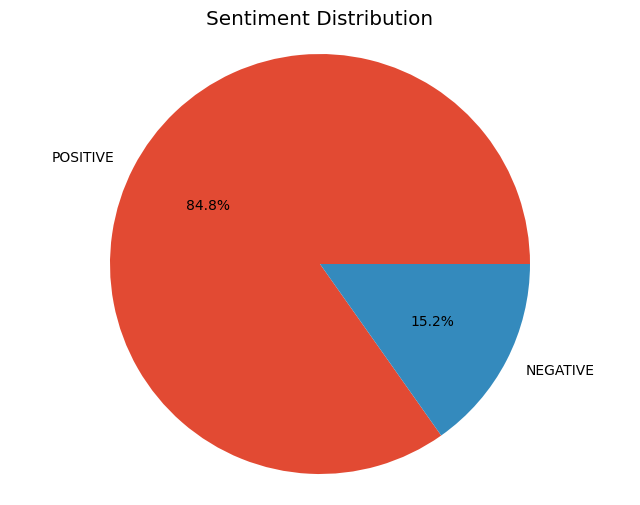

In [174]:
sentiment_counts = df_copy['Sentiment'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.axis('equal')

# Display the pie chart
plt.show()
